In [72]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [73]:
# Use case i chose: Predict stock market price for TESLA

In [74]:
url = "https://raw.githubusercontent.com/Qudsiah2808/Assignment2-DAVE3625/main/TESLA.csv"
df = pd.read_csv(url)

In [75]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-26,411.630005,425.760010,410.000000,420.279999,420.279999,28239200
1,2020-10-27,423.760010,430.500000,420.100006,424.679993,424.679993,22686500
2,2020-10-28,416.480011,418.600006,406.000000,406.019989,406.019989,25451400
3,2020-10-29,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
4,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300


In [76]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = df["Date"].apply(lambda x: x.toordinal())

In [77]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,737724,411.630005,425.760010,410.000000,420.279999,420.279999,28239200
1,737725,423.760010,430.500000,420.100006,424.679993,424.679993,22686500
2,737726,416.480011,418.600006,406.000000,406.019989,406.019989,25451400
3,737727,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
4,737728,406.899994,407.589996,379.109985,388.040009,388.040009,42511300


In [78]:
X = pd.DataFrame(df['Date']) 
y = pd.DataFrame(df['Close'])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=56)

In [80]:
# Here I use regression
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_train)

In [81]:
sns.set(rc={'figure.figsize':(12,10)})

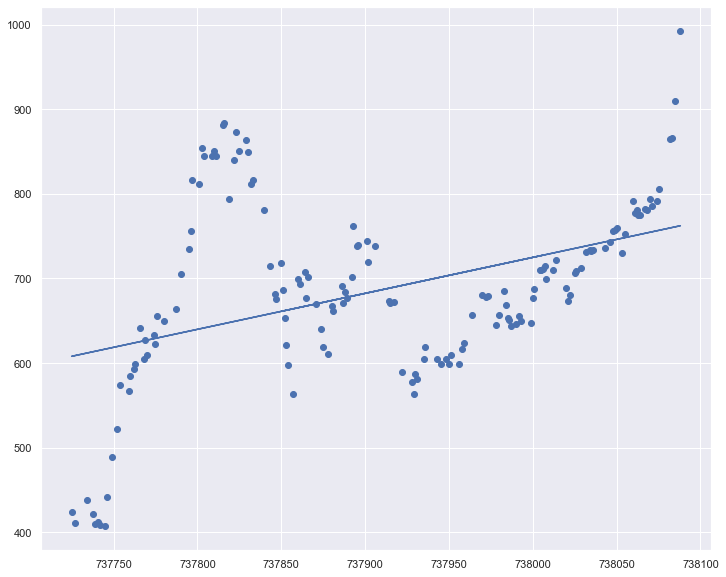

MSE = 9808.088067958939


In [82]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred)
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

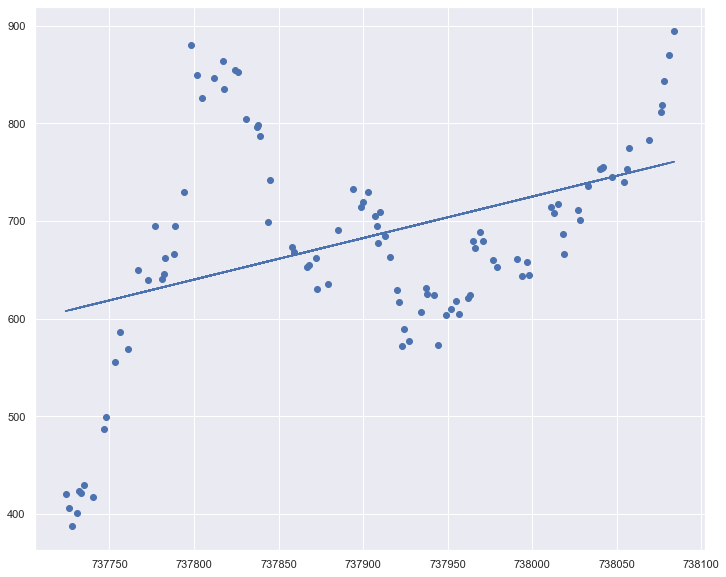

MSE = 10308.715675198375


In [83]:
Y_pred = linear_regressor.predict(X_test)  
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred)
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [84]:
Y_pred = linear_regressor.predict(X_train) 

def predictPrice(date):
    date1 = datetime.strptime(date, '%Y-%m-%d')
    date2 = date1.toordinal()
    
    pred = linear_regressor.predict([[date2]]) 
    print(f"Predicted price: {pred[0][0]}")
    print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

In [85]:
predictPrice("2020-08-28")

Predicted price: 582.5531097248313
MSE = 9808.088067958939
